## Getting video links

In [ ]:

url = 'https://rutube.ru/channel/695267/videos/'       
# Fetch the data using BeautifulSoup after all data is loaded
soup = BeautifulSoup(driver.page_source, "html.parser")
# Process and save the data as needed

# Close the WebDriver session
driver.quit()

# Send a GET request to the page
response = requests.get(url)

# Parse the content of the page with Beautiful Soup
soup = BeautifulSoup(response.text, 'html.parser')

# Find all <a> elements that contain the video links
# Replace 'w4p-card-poster-module_posterWrapper' with the actual class name if needed
#video_links = soup.find_all('a', class_ = 'wdp-card-poster-module__posterWrapper')
import re
#video_links = soup.find_all("a", class_=re.compile("link", re.I))
video_links = soup.find_all('a', class_ = 'wdp-card-poster-module__posterWrapper')
# Extract the href attributes from the anchor elements
video_urls = [link['href'] for link in video_links]

# Print out or process the video URLs as needed
for video_url in video_urls:
    print(video_url)



In [5]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup

# Setup WebDriver using Service
service = Service('/Users/miraslavats/Desktop/chromedriver-mac-arm64/chromedriver')  # Ensure this path is correct
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open the website
url = 'https://rutube.ru/channel/695267/videos/'
driver.get(url)

# Give the page some initial time to load
time.sleep(5)

# Define the number of scrolls you want
number_of_scrolls = 90

# Scroll down 'number_of_scrolls' times
for _ in range(number_of_scrolls):
    # Scroll down to the bottom of the page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait to load the page
    time.sleep(5)  # Adjust time depending on the website's response time

# Now you can parse the page with Beautiful Soup
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Extract video links
video_links = soup.find_all('a', class_='wdp-card-poster-module__posterWrapper')
video_urls = [link['href'] for link in video_links]

# Print out or process the video URLs
for video_url in video_urls:
    print(video_url)

# Close the WebDriver session
driver.quit()


/video/6ecd6c4bc6753e4ba8d8f30e94df249b/
/video/12b0d54c8ebdffe9226b820c89924887/
/video/59d1780c0aac176547a373a76432adf1/
/video/f129d4386672cce6c9413293f49d67a2/
/video/b4ee9013e2c39d11287cf402ec0b69ec/
/video/53e6a4b8da226a31255f57f8b4ad2841/
/video/b364060bfc71d6bc19a3720773e5a72e/
/video/14e75cc43455e5c246c46e205fc58821/
/video/440612af2650dbbcd8c21b9d9564c195/
/video/166ed4df51d510e805d24d1e39ecc29d/
/video/cfa70cd9af6b25beddef83a367e61228/
/video/abc748a6ffc72af0ace928c18a54d3fa/
/video/e3ffdc16f754e5b8df06c097addbd8e1/
/video/5672b54ef8aca8097dcd8c5140a5f722/
/video/b630465eb56fd557572e9e277464dbce/
/video/117b6af9f9ac74955dfd18f7ec9ffa01/
/video/7cc4fa2f0843da3a38d7c9ab2c3a19f9/
/video/92fa2051256205d37fd5fa17115ad0c8/
/video/b39fa92752354f47650c83e1843e9af0/
/video/9b08565a72c3250ff4b3fd5fc8847a71/
/video/877d4f511b1cc4da1417ea5abceb79cd/
/video/8abd2448fb1d617a958d16ba40f33725/
/video/7a4da2817ed449cbc9ed6bf111193345/
/video/2423bb3c002af81c38db52ac9c98c6f6/
/video/053a796a5

In [11]:
#len(video_urls)
file_path = '/Users/miraslavats/Library/CloudStorage/GoogleDrive-miraslava@uni.minerva.edu/My Drive/urls.txt'

# Write URLs to file
with open(file_path, 'w') as file:
    for url in video_urls:
        file.write(url + '\n')

In [10]:
import subprocess

def download_audio(video_url, output_directory):
    # Command to download the best quality audio only
    command = [
        'youtube-dl',
        'https://rutube.ru'+video_url,
        '-f', 'audio',
        '-o', f'{output_directory}/%(title)s.%(ext)s'
    ]
    
    # Run the command
    subprocess.run(command)

output_directory = 'Users/miraslavats/Library/CloudStorage/GoogleDrive-miraslava@uni.minerva.edu.com/My Drive'

# Download audio for each URL
for url in video_urls:
    download_audio(url, output_directory)


[rutube] 6ecd6c4bc6753e4ba8d8f30e94df249b: Downloading video JSON
[rutube] 6ecd6c4bc6753e4ba8d8f30e94df249b: Downloading options JSON
[rutube] 6ecd6c4bc6753e4ba8d8f30e94df249b: Downloading m3u8 information
[rutube] 6ecd6c4bc6753e4ba8d8f30e94df249b: Downloading m3u8 information


ERROR: requested format not available


[rutube] 12b0d54c8ebdffe9226b820c89924887: Downloading video JSON
[rutube] 12b0d54c8ebdffe9226b820c89924887: Downloading options JSON
[rutube] 12b0d54c8ebdffe9226b820c89924887: Downloading m3u8 information
[rutube] 12b0d54c8ebdffe9226b820c89924887: Downloading m3u8 information


ERROR: requested format not available


[rutube] 59d1780c0aac176547a373a76432adf1: Downloading video JSON



ERROR: Interrupted by user


KeyboardInterrupt: 

In [26]:
import subprocess

def download_video(video_url, output_directory):
    # Command to download the best quality video and audio and merge them
    command = [
        'youtube-dl',
        video_url,
        '-f', 'bestvideo+bestaudio/best',
        '-o', f'{output_directory}/%(title)s.%(ext)s'
    ]
    
    # Run the command
    subprocess.run(command)

output_directory = 'Users/miraslavats/Library/CloudStorage/GoogleDrive-miraslava@uni.minerva.edu.com/My Drive'

for url in video_urls:
    download_video(url, output_directory)

[rutube] eb1ce07c80954f91cc0d993b1321bfdf: Downloading video JSON
[rutube] eb1ce07c80954f91cc0d993b1321bfdf: Downloading options JSON
[rutube] eb1ce07c80954f91cc0d993b1321bfdf: Downloading m3u8 information
[rutube] eb1ce07c80954f91cc0d993b1321bfdf: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Лукашенко - наша Конституция даёт возможность достойно жить _ Белорусской Конституции — 30 лет!.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x14181b600] Open

[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-72-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-73-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-74-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-75-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-76-v1-a1.ts' for reading
[http @ 0x141011400] Open

[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-115-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-116-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-117-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-118-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-119-v1-a1.ts' for reading
[http @ 0x14181b600]

[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-158-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-159-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-160-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-161-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-162-v1-a1.ts' for reading
[http @ 0x141011400]

[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-201-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-202-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-203-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-204-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-205-v1-a1.ts' for reading
[http @ 0x14181b600]

[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-243-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-244-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-245-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-246-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-247-v1-a1.ts' for reading
[http @ 0x14181b600]

[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-286-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-287-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-288-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-289-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-290-v1-a1.ts' for reading
[http @ 0x141011400]

[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-328-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-329-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-330-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-331-v1-a1.ts' for reading
[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-332-v1-a1.ts' for reading
[http @ 0x141011400]

[http @ 0x14181b600] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-370-v1-a1.ts' for reading
[http @ 0x141011400] Opening 'http://river-7-701.rutube.ru/hls-vod/hevbs21lF6MMqgfo7sBQhA/1711163347/2080/0x5000c500f1db0bd5/12f194be8a5641aa8c61a6560128d474.mp4/segment-371-v1-a1.ts' for reading
frame=36985 fps=346 q=-1.0 Lsize=  497166kB time=00:24:39.45 bitrate=2752.9kbits/s speed=13.8x    
video:472643kB audio:23552kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.195754%


[ffmpeg] Downloaded 509098360 bytes
[download] 100% of 485.51MiB in 01:51
[rutube] 98ff219b87180f28b757cb1019c65c75: Downloading video JSON
[rutube] 98ff219b87180f28b757cb1019c65c75: Downloading options JSON
[rutube] 98ff219b87180f28b757cb1019c65c75: Downloading m3u8 information
[rutube] 98ff219b87180f28b757cb1019c65c75: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/❗️ Ответные меры Беларуси на недружественные действия Литвы.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x12d814c00] Opening 'http://river-7-701.rutube.ru/hls-vod/VAmfveRcxyTPp0IZZEby1Q/1711163465/2084/0x5000c500f1df1dc6/519000abcc4e494c828f23e6d93384a1.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x12e810200] Opening 'http://river-7-701.rutube.ru/hls-vod/VAmfveRcxyTPp0IZZEby1Q/1711163465/2084/0x5000c500f1df1dc6/519000abcc4e494c828f23e6d93384a1.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x12d814c00] Opening 'http://river-7-701.rutube.ru/hls-vod/VAmfveRcxyTPp0IZZEby1Q/1711163465/2084/0x5000c500f1df1dc6/519000abcc4e494c828f23e6d93384a1.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x12e810200] Opening 'http://river-7-701.rutube.ru/hls-vod/VAmfveRcxyTPp0IZZEby1Q/1711163465/2084/0x5000c500f1df1dc6/519000abcc4e494c828f23e6d93384a1.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x12d814c00] Opening 'http://river-7-701.rutube.ru/hls-vod/VAmfveRcxyTPp0IZZEby1Q/1711163465/2084/0x5000c500f1df1dc6/519000abcc4e494c828f23e6d93384a1.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x12e810200] Open

[ffmpeg] Downloaded 62151567 bytes
[download] 100% of 59.27MiB in 00:12
[rutube] 762f98712820622276c6fdd7d383d169: Downloading video JSON
[rutube] 762f98712820622276c6fdd7d383d169: Downloading options JSON
[rutube] 762f98712820622276c6fdd7d383d169: Downloading m3u8 information
[rutube] 762f98712820622276c6fdd7d383d169: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/День конституции - сообща укреплять государственный фундамент! Право на Независимость. Фильм АТН.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x15d027a00] Open

[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-113-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-114-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-115-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-116-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-117-v1-a1.ts' for reading
[http @ 0x15d027a00]

[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-155-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-156-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-157-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-158-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-159-v1-a1.ts' for reading
[http @ 0x15d027a00]

[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-198-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-199-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-200-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-201-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-202-v1-a1.ts' for reading
[http @ 0x15d01d000]

[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-240-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-241-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-242-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-243-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-244-v1-a1.ts' for reading
[http @ 0x15d01d000]

[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-282-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-283-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-284-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-285-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-286-v1-a1.ts' for reading
[http @ 0x15d01d000]

[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-324-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-325-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-326-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-327-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-328-v1-a1.ts' for reading
[http @ 0x15d01d000]

[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-366-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-367-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-368-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-369-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-370-v1-a1.ts' for reading
[http @ 0x15d01d000]

[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-408-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-409-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-410-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-411-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-412-v1-a1.ts' for reading
[http @ 0x15d01d000]

[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-450-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-451-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-452-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-453-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-454-v1-a1.ts' for reading
[http @ 0x15d01d000]

[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-492-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-493-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-494-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-495-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-496-v1-a1.ts' for reading
[http @ 0x15d01d000]

[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-534-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-535-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-536-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-537-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-538-v1-a1.ts' for reading
[http @ 0x15d01d000]

[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-576-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-577-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-578-v1-a1.ts' for reading
[http @ 0x15d01d000] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-579-v1-a1.ts' for reading
[http @ 0x15d027a00] Opening 'http://river-7-701.rutube.ru/hls-vod/OcnpN-1sJKnBlcdnINIrrQ/1711163484/2084/0x5000c500f1e5ade1/fff284c33140403da8d7ef220e97f73b.mp4/segment-580-v1-a1.ts' for reading
[http @ 0x15d01d000]

[ffmpeg] Downloaded 2464642268 bytes
[download] 100% of 2.30GiB in 04:07
[rutube] 231ec277c4237ee5c6a44ef3d18f6777: Downloading video JSON
[rutube] 231ec277c4237ee5c6a44ef3d18f6777: Downloading options JSON
[rutube] 231ec277c4237ee5c6a44ef3d18f6777: Downloading m3u8 information
[rutube] 231ec277c4237ee5c6a44ef3d18f6777: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/❗️Критическая ситуация на литовской границе - свыше трех тысяч фур ожидают въезда в ЕС! Панорама.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x138010200] Opening 'http://river-7-701.rutube.ru/hls-vod/wWkexcjy4h7PdYc8mASVOw/1711163738/2094/0x5000c500f1d9c3d4/e6440c8d619840feb2256e196d0d03a1.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x13781b400] Opening 'http://river-7-701.rutube.ru/hls-vod/wWkexcjy4h7PdYc8mASVOw/1711163738/2094/0x5000c500f1d9c3d4/e6440c8d619840feb2256e196d0d03a1.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x138010200] Opening 'http://river-7-701.rutube.ru/hls-vod/wWkexcjy4h7PdYc8mASVOw/1711163738/2094/0x5000c500f1d9c3d4/e6440c8d619840feb2256e196d0d03a1.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x13781b400] Opening 'http://river-7-701.rutube.ru/hls-vod/wWkexcjy4h7PdYc8mASVOw/1711163738/2094/0x5000c500f1d9c3d4/e6440c8d619840feb2256e196d0d03a1.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x138010200] Opening 'http://river-7-701.rutube.ru/hls-vod/wWkexcjy4h7PdYc8mASVOw/1711163738/2094/0x5000c500f1d9c3d4/e6440c8d619840feb2256e196d0d03a1.mp4/segment-34-v1-a1.ts' for reading
[http @ 0x13781b400] Open

[ffmpeg] Downloaded 89058485 bytes
[download] 100% of 84.93MiB in 00:15
[rutube] 19c403f9f1ab15604ee6ed3c201a4b0a: Downloading video JSON
[rutube] 19c403f9f1ab15604ee6ed3c201a4b0a: Downloading options JSON
[rutube] 19c403f9f1ab15604ee6ed3c201a4b0a: Downloading m3u8 information
[rutube] 19c403f9f1ab15604ee6ed3c201a4b0a: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Увядший европейский сад - протесты расширяют географию. Таблица Менделевой. Панорама.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x134815000] Opening 'http://river-7-701.rutube.ru/hls-vod/7PPPdXvSBYOh5GpbtyUaRQ/1711163760/2088/0x5000c500f1e58a11/8f34c5fbf2eb48eda43e84b8f9e0d1ac.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x135010200] Opening 'http://river-7-701.rutube.ru/hls-vod/7PPPdXvSBYOh5GpbtyUaRQ/1711163760/2088/0x5000c500f1e58a11/8f34c5fbf2eb48eda43e84b8f9e0d1ac.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x134815000] Opening 'http://river-7-701.rutube.ru/hls-vod/7PPPdXvSBYOh5GpbtyUaRQ/1711163760/2088/0x5000c500f1e58a11/8f34c5fbf2eb48eda43e84b8f9e0d1ac.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x135010200] Opening 'http://river-7-701.rutube.ru/hls-vod/7PPPdXvSBYOh5GpbtyUaRQ/1711163760/2088/0x5000c500f1e58a11/8f34c5fbf2eb48eda43e84b8f9e0d1ac.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x134815000] Opening 'http://river-7-701.rutube.ru/hls-vod/7PPPdXvSBYOh5GpbtyUaRQ/1711163760/2088/0x5000c500f1e58a11/8f34c5fbf2eb48eda43e84b8f9e0d1ac.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x135010200] Open

[http @ 0x135010200] Opening 'http://river-7-701.rutube.ru/hls-vod/7PPPdXvSBYOh5GpbtyUaRQ/1711163760/2088/0x5000c500f1e58a11/8f34c5fbf2eb48eda43e84b8f9e0d1ac.mp4/segment-72-v1-a1.ts' for reading
[http @ 0x134815000] Opening 'http://river-7-701.rutube.ru/hls-vod/7PPPdXvSBYOh5GpbtyUaRQ/1711163760/2088/0x5000c500f1e58a11/8f34c5fbf2eb48eda43e84b8f9e0d1ac.mp4/segment-73-v1-a1.ts' for reading
[http @ 0x135010200] Opening 'http://river-7-701.rutube.ru/hls-vod/7PPPdXvSBYOh5GpbtyUaRQ/1711163760/2088/0x5000c500f1e58a11/8f34c5fbf2eb48eda43e84b8f9e0d1ac.mp4/segment-74-v1-a1.ts' for reading
[http @ 0x134815000] Opening 'http://river-7-701.rutube.ru/hls-vod/7PPPdXvSBYOh5GpbtyUaRQ/1711163760/2088/0x5000c500f1e58a11/8f34c5fbf2eb48eda43e84b8f9e0d1ac.mp4/segment-75-v1-a1.ts' for reading
frame= 7350 fps=469 q=-1.0 Lsize=  108346kB time=00:04:54.05 bitrate=3018.4kbits/s speed=18.8x    
video:101191kB audio:6979kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.162694%


[ffmpeg] Downloaded 110946719 bytes
[download] 100% of 105.81MiB in 00:17
[rutube] ed59f0e8f4cd538c747a2d48f237fff9: Downloading video JSON
[rutube] ed59f0e8f4cd538c747a2d48f237fff9: Downloading options JSON
[rutube] ed59f0e8f4cd538c747a2d48f237fff9: Downloading m3u8 information
[rutube] ed59f0e8f4cd538c747a2d48f237fff9: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Особенная экскурсия для особенных ребят во Дворце Независимости. Панорама.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x13e015000] Opening 'http://river-7-701.rutube.ru/hls-vod/yBgLOy0pYeZj3GTq4suWfw/1711163784/2084/0x5000c500f1dcd8d3/182ad3c83b6743feb7336c97a2a3a538.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x13e810200] Opening 'http://river-7-701.rutube.ru/hls-vod/yBgLOy0pYeZj3GTq4suWfw/1711163784/2084/0x5000c500f1dcd8d3/182ad3c83b6743feb7336c97a2a3a538.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x13e015000] Opening 'http://river-7-701.rutube.ru/hls-vod/yBgLOy0pYeZj3GTq4suWfw/1711163784/2084/0x5000c500f1dcd8d3/182ad3c83b6743feb7336c97a2a3a538.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x13e810200] Opening 'http://river-7-701.rutube.ru/hls-vod/yBgLOy0pYeZj3GTq4suWfw/1711163784/2084/0x5000c500f1dcd8d3/182ad3c83b6743feb7336c97a2a3a538.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x13e015000] Opening 'http://river-7-701.rutube.ru/hls-vod/yBgLOy0pYeZj3GTq4suWfw/1711163784/2084/0x5000c500f1dcd8d3/182ad3c83b6743feb7336c97a2a3a538.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x13e810200] Open

[http @ 0x13e810200] Opening 'http://river-7-701.rutube.ru/hls-vod/yBgLOy0pYeZj3GTq4suWfw/1711163784/2084/0x5000c500f1dcd8d3/182ad3c83b6743feb7336c97a2a3a538.mp4/segment-72-v1-a1.ts' for reading
[http @ 0x13e015000] Opening 'http://river-7-701.rutube.ru/hls-vod/yBgLOy0pYeZj3GTq4suWfw/1711163784/2084/0x5000c500f1dcd8d3/182ad3c83b6743feb7336c97a2a3a538.mp4/segment-73-v1-a1.ts' for reading
[http @ 0x13e810200] Opening 'http://river-7-701.rutube.ru/hls-vod/yBgLOy0pYeZj3GTq4suWfw/1711163784/2084/0x5000c500f1dcd8d3/182ad3c83b6743feb7336c97a2a3a538.mp4/segment-74-v1-a1.ts' for reading
[http @ 0x13e015000] Opening 'http://river-7-701.rutube.ru/hls-vod/yBgLOy0pYeZj3GTq4suWfw/1711163784/2084/0x5000c500f1dcd8d3/182ad3c83b6743feb7336c97a2a3a538.mp4/segment-75-v1-a1.ts' for reading
[http @ 0x13e810200] Opening 'http://river-7-701.rutube.ru/hls-vod/yBgLOy0pYeZj3GTq4suWfw/1711163784/2084/0x5000c500f1dcd8d3/182ad3c83b6743feb7336c97a2a3a538.mp4/segment-76-v1-a1.ts' for reading
[http @ 0x13e015000] Open

[ffmpeg] Downloaded 195449036 bytes
[download] 100% of 186.39MiB in 00:27
[rutube] 783e1798a2e53bd21fee0f0ab017a09c: Downloading video JSON
[rutube] 783e1798a2e53bd21fee0f0ab017a09c: Downloading options JSON
[rutube] 783e1798a2e53bd21fee0f0ab017a09c: Downloading m3u8 information
[rutube] 783e1798a2e53bd21fee0f0ab017a09c: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Роль Зеленского подходит к финалу _ Ереван дал крен на Запад _ Горячий Ближний Восток. Тренды.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x154010200] Open

[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-72-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-73-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-74-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-75-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-76-v1-a1.ts' for reading
[http @ 0x153810c00] Open

[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-115-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-116-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-117-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-118-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-119-v1-a1.ts' for reading
[http @ 0x154010200]

[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-157-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-158-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-159-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-160-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-161-v1-a1.ts' for reading
[http @ 0x154010200]

[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-199-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-200-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-201-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-202-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-203-v1-a1.ts' for reading
[http @ 0x154010200]

[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-241-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-242-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-243-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-244-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-245-v1-a1.ts' for reading
[http @ 0x154010200]

[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-284-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-285-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-286-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-287-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-288-v1-a1.ts' for reading
[http @ 0x153810c00]

[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-326-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-327-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-328-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-329-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-330-v1-a1.ts' for reading
[http @ 0x153810c00]

[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-368-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-369-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-370-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-371-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-372-v1-a1.ts' for reading
[http @ 0x153810c00]

[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-411-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-412-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-413-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-414-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-415-v1-a1.ts' for reading
[http @ 0x154010200]

[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-453-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-454-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-455-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-456-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-457-v1-a1.ts' for reading
[http @ 0x154010200]

[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-495-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-496-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-497-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-498-v1-a1.ts' for reading
[http @ 0x153810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/kAPuGteBqBFWaLvV2kqVvQ/1711163818/2086/0x5000c500f1db0306/a544e60756ba461db297b100e570b329.mp4/segment-499-v1-a1.ts' for reading
[http @ 0x154010200]

[ffmpeg] Downloaded 1934878356 bytes
[download] 100% of 1.80GiB in 03:14
[rutube] f164513ddce6b40d06b0113ce72d0825: Downloading video JSON
[rutube] f164513ddce6b40d06b0113ce72d0825: Downloading options JSON
[rutube] f164513ddce6b40d06b0113ce72d0825: Downloading m3u8 information
[rutube] f164513ddce6b40d06b0113ce72d0825: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Блок НАТО не только расширился, но и активно мобилизует свою возросшую мощь. Панорама.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x12b810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/7PoKJ6DNoXS_FscLCE6yww/1711164019/2084/0x5000c500f1db3beb/32942a4a930e444b8a4e03af53e0c568.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x12a815000] Opening 'http://river-7-701.rutube.ru/hls-vod/7PoKJ6DNoXS_FscLCE6yww/1711164019/2084/0x5000c500f1db3beb/32942a4a930e444b8a4e03af53e0c568.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x12b810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/7PoKJ6DNoXS_FscLCE6yww/1711164019/2084/0x5000c500f1db3beb/32942a4a930e444b8a4e03af53e0c568.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x12a815000] Opening 'http://river-7-701.rutube.ru/hls-vod/7PoKJ6DNoXS_FscLCE6yww/1711164019/2084/0x5000c500f1db3beb/32942a4a930e444b8a4e03af53e0c568.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x12b810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/7PoKJ6DNoXS_FscLCE6yww/1711164019/2084/0x5000c500f1db3beb/32942a4a930e444b8a4e03af53e0c568.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x12a815000] Open

[http @ 0x12b810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/7PoKJ6DNoXS_FscLCE6yww/1711164019/2084/0x5000c500f1db3beb/32942a4a930e444b8a4e03af53e0c568.mp4/segment-73-v1-a1.ts' for reading
[http @ 0x12a815000] Opening 'http://river-7-701.rutube.ru/hls-vod/7PoKJ6DNoXS_FscLCE6yww/1711164019/2084/0x5000c500f1db3beb/32942a4a930e444b8a4e03af53e0c568.mp4/segment-74-v1-a1.ts' for reading
[http @ 0x12b810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/7PoKJ6DNoXS_FscLCE6yww/1711164019/2084/0x5000c500f1db3beb/32942a4a930e444b8a4e03af53e0c568.mp4/segment-75-v1-a1.ts' for reading
[http @ 0x12a815000] Opening 'http://river-7-701.rutube.ru/hls-vod/7PoKJ6DNoXS_FscLCE6yww/1711164019/2084/0x5000c500f1db3beb/32942a4a930e444b8a4e03af53e0c568.mp4/segment-76-v1-a1.ts' for reading
[http @ 0x12b810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/7PoKJ6DNoXS_FscLCE6yww/1711164019/2084/0x5000c500f1db3beb/32942a4a930e444b8a4e03af53e0c568.mp4/segment-77-v1-a1.ts' for reading
[http @ 0x12a815000] Open

[ffmpeg] Downloaded 125703862 bytes
[download] 100% of 119.88MiB in 00:20
[rutube] 221e60df04e6e5735f69911f4af55bc0: Downloading video JSON
[rutube] 221e60df04e6e5735f69911f4af55bc0: Downloading options JSON
[rutube] 221e60df04e6e5735f69911f4af55bc0: Downloading m3u8 information
[rutube] 221e60df04e6e5735f69911f4af55bc0: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Помилование — исключительная компетенция Президента. Панорама.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x12781b000] Opening 'http://river-7-701.rutube.ru/hls-vod/ctu0pcofkyLsExZhkrNBRA/1711164045/2092/0x5000c500f1dd30a7/08a5eac3f7c944b390f5bf84979704b9.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x128810200] Opening 'http://river-7-701.rutube.ru/hls-vod/ctu0pcofkyLsExZhkrNBRA/1711164045/2092/0x5000c500f1dd30a7/08a5eac3f7c944b390f5bf84979704b9.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x12781b000] Opening 'http://river-7-701.rutube.ru/hls-vod/ctu0pcofkyLsExZhkrNBRA/1711164045/2092/0x5000c500f1dd30a7/08a5eac3f7c944b390f5bf84979704b9.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x128810200] Opening 'http://river-7-701.rutube.ru/hls-vod/ctu0pcofkyLsExZhkrNBRA/1711164045/2092/0x5000c500f1dd30a7/08a5eac3f7c944b390f5bf84979704b9.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x12781b000] Opening 'http://river-7-701.rutube.ru/hls-vod/ctu0pcofkyLsExZhkrNBRA/1711164045/2092/0x5000c500f1dd30a7/08a5eac3f7c944b390f5bf84979704b9.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x128810200] Open

[http @ 0x128810200] Opening 'http://river-7-701.rutube.ru/hls-vod/ctu0pcofkyLsExZhkrNBRA/1711164045/2092/0x5000c500f1dd30a7/08a5eac3f7c944b390f5bf84979704b9.mp4/segment-72-v1-a1.ts' for reading
[http @ 0x12781b000] Opening 'http://river-7-701.rutube.ru/hls-vod/ctu0pcofkyLsExZhkrNBRA/1711164045/2092/0x5000c500f1dd30a7/08a5eac3f7c944b390f5bf84979704b9.mp4/segment-73-v1-a1.ts' for reading
[http @ 0x128810200] Opening 'http://river-7-701.rutube.ru/hls-vod/ctu0pcofkyLsExZhkrNBRA/1711164045/2092/0x5000c500f1dd30a7/08a5eac3f7c944b390f5bf84979704b9.mp4/segment-74-v1-a1.ts' for reading
[http @ 0x12781b000] Opening 'http://river-7-701.rutube.ru/hls-vod/ctu0pcofkyLsExZhkrNBRA/1711164045/2092/0x5000c500f1dd30a7/08a5eac3f7c944b390f5bf84979704b9.mp4/segment-75-v1-a1.ts' for reading
[http @ 0x128810200] Opening 'http://river-7-701.rutube.ru/hls-vod/ctu0pcofkyLsExZhkrNBRA/1711164045/2092/0x5000c500f1dd30a7/08a5eac3f7c944b390f5bf84979704b9.mp4/segment-76-v1-a1.ts' for reading
[http @ 0x12781b000] Open

[ffmpeg] Downloaded 89353830 bytes
[download] 100% of 85.21MiB in 00:21
[rutube] 6c3fca98f626ad93bf2116b422fe23b4: Downloading video JSON
[rutube] 6c3fca98f626ad93bf2116b422fe23b4: Downloading options JSON
[rutube] 6c3fca98f626ad93bf2116b422fe23b4: Downloading m3u8 information
[rutube] 6c3fca98f626ad93bf2116b422fe23b4: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Почему беглым в соседних странах придется паковать чемоданы. Площадка.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x140010200] Opening 'http://river-7-701.rutube.ru/hls-vod/rgkRZyAkdxdP5llQaPxJeA/1711164073/2092/0x5000c500f1db0e75/d6ba84402e5c4a03a7ad1af4f6d6d97e.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x13f81b000] Opening 'http://river-7-701.rutube.ru/hls-vod/rgkRZyAkdxdP5llQaPxJeA/1711164073/2092/0x5000c500f1db0e75/d6ba84402e5c4a03a7ad1af4f6d6d97e.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x140010200] Opening 'http://river-7-701.rutube.ru/hls-vod/rgkRZyAkdxdP5llQaPxJeA/1711164073/2092/0x5000c500f1db0e75/d6ba84402e5c4a03a7ad1af4f6d6d97e.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x13f81b000] Opening 'http://river-7-701.rutube.ru/hls-vod/rgkRZyAkdxdP5llQaPxJeA/1711164073/2092/0x5000c500f1db0e75/d6ba84402e5c4a03a7ad1af4f6d6d97e.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x140010200] Opening 'http://river-7-701.rutube.ru/hls-vod/rgkRZyAkdxdP5llQaPxJeA/1711164073/2092/0x5000c500f1db0e75/d6ba84402e5c4a03a7ad1af4f6d6d97e.mp4/segment-34-v1-a1.ts' for reading
[http @ 0x13f81b000] Open

[ffmpeg] Downloaded 40599888 bytes
[download] 100% of 38.72MiB in 00:13
[rutube] deac7432755f8b1e072e0de8df7b69a2: Downloading video JSON
[rutube] deac7432755f8b1e072e0de8df7b69a2: Downloading options JSON
[rutube] deac7432755f8b1e072e0de8df7b69a2: Downloading m3u8 information
[rutube] deac7432755f8b1e072e0de8df7b69a2: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/В канун Дня Конституции юным белорусам торжественно вручили первые паспорта. Панорама.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x14901b400] Opening 'http://river-7-701.rutube.ru/hls-vod/ea8pAIe-nsEdMCZnpW1esg/1711164093/2080/0x5000c500f1db1d10/a9a9953d024242808ad9e1693d1d29f5.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x149810200] Opening 'http://river-7-701.rutube.ru/hls-vod/ea8pAIe-nsEdMCZnpW1esg/1711164093/2080/0x5000c500f1db1d10/a9a9953d024242808ad9e1693d1d29f5.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x14901b400] Opening 'http://river-7-701.rutube.ru/hls-vod/ea8pAIe-nsEdMCZnpW1esg/1711164093/2080/0x5000c500f1db1d10/a9a9953d024242808ad9e1693d1d29f5.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x149810200] Opening 'http://river-7-701.rutube.ru/hls-vod/ea8pAIe-nsEdMCZnpW1esg/1711164093/2080/0x5000c500f1db1d10/a9a9953d024242808ad9e1693d1d29f5.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x14901b400] Opening 'http://river-7-701.rutube.ru/hls-vod/ea8pAIe-nsEdMCZnpW1esg/1711164093/2080/0x5000c500f1db1d10/a9a9953d024242808ad9e1693d1d29f5.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x149810200] Open

[http @ 0x14901b400] Opening 'http://river-7-701.rutube.ru/hls-vod/ea8pAIe-nsEdMCZnpW1esg/1711164093/2080/0x5000c500f1db1d10/a9a9953d024242808ad9e1693d1d29f5.mp4/segment-73-v1-a1.ts' for reading
[http @ 0x149810200] Opening 'http://river-7-701.rutube.ru/hls-vod/ea8pAIe-nsEdMCZnpW1esg/1711164093/2080/0x5000c500f1db1d10/a9a9953d024242808ad9e1693d1d29f5.mp4/segment-74-v1-a1.ts' for reading
[http @ 0x14901b400] Opening 'http://river-7-701.rutube.ru/hls-vod/ea8pAIe-nsEdMCZnpW1esg/1711164093/2080/0x5000c500f1db1d10/a9a9953d024242808ad9e1693d1d29f5.mp4/segment-75-v1-a1.ts' for reading
[http @ 0x149810200] Opening 'http://river-7-701.rutube.ru/hls-vod/ea8pAIe-nsEdMCZnpW1esg/1711164093/2080/0x5000c500f1db1d10/a9a9953d024242808ad9e1693d1d29f5.mp4/segment-76-v1-a1.ts' for reading
frame= 7442 fps=492 q=-1.0 Lsize=   70597kB time=00:04:57.72 bitrate=1942.5kbits/s speed=19.7x    
video:65671kB audio:4740kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.264243%


[ffmpeg] Downloaded 72291221 bytes
[download] 100% of 68.94MiB in 00:16
[rutube] 5f2cffcb7cfaef98316ac806cfd5796a: Downloading video JSON
[rutube] 5f2cffcb7cfaef98316ac806cfd5796a: Downloading options JSON
[rutube] 5f2cffcb7cfaef98316ac806cfd5796a: Downloading m3u8 information
[rutube] 5f2cffcb7cfaef98316ac806cfd5796a: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Подробности крушения Ил-76 в Ивановской области России. Панорама.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[ffmpeg] Downloaded 29976792 bytes
[download] 100% of 28.59MiB in 00:06
[rutube] 2286124df6f6036abb5e32eccf6f539d: Downloading video JSON
[rutube] 2286124df6f6036abb5e32eccf6f539d: Downloading options JSON
[rutube] 2286124df6f6036abb5e32eccf6f539d: Downloading m3u8 information
[rutube] 2286124df6f6036abb5e32eccf6f539d: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Лидеры ЕС бурно обсуждают, при каких условиях задействуют свои армии в Украине. Диспозиция. Панорама.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x135810200] Opening 'http://river-7-701.rutube.ru/hls-vod/u89B4RiwfSgzF3nDxK6l0Q/1711164129/2094/0x5000c500f1d5e363/7402c44faf6c4ae58adf20d6e767570d.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x135011000] Opening 'http://river-7-701.rutube.ru/hls-vod/u89B4RiwfSgzF3nDxK6l0Q/1711164129/2094/0x5000c500f1d5e363/7402c44faf6c4ae58adf20d6e767570d.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x135810200] Opening 'http://river-7-701.rutube.ru/hls-vod/u89B4RiwfSgzF3nDxK6l0Q/1711164129/2094/0x5000c500f1d5e363/7402c44faf6c4ae58adf20d6e767570d.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x135011000] Opening 'http://river-7-701.rutube.ru/hls-vod/u89B4RiwfSgzF3nDxK6l0Q/1711164129/2094/0x5000c500f1d5e363/7402c44faf6c4ae58adf20d6e767570d.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x135810200] Opening 'http://river-7-701.rutube.ru/hls-vod/u89B4RiwfSgzF3nDxK6l0Q/1711164129/2094/0x5000c500f1d5e363/7402c44faf6c4ae58adf20d6e767570d.mp4/segment-34-v1-a1.ts' for reading
[http @ 0x135011000] Open

[http @ 0x135810200] Opening 'http://river-7-701.rutube.ru/hls-vod/u89B4RiwfSgzF3nDxK6l0Q/1711164129/2094/0x5000c500f1d5e363/7402c44faf6c4ae58adf20d6e767570d.mp4/segment-74-v1-a1.ts' for reading
frame= 7222 fps=470 q=-1.0 Lsize=   75570kB time=00:04:48.92 bitrate=2142.7kbits/s speed=18.8x    
video:68539kB audio:6857kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.229529%


[ffmpeg] Downloaded 77383509 bytes
[download] 100% of 73.80MiB in 00:17
[rutube] fc2fe056ca0c33e0c18d5433a21a30a2: Downloading video JSON
[rutube] fc2fe056ca0c33e0c18d5433a21a30a2: Downloading options JSON
[rutube] fc2fe056ca0c33e0c18d5433a21a30a2: Downloading m3u8 information
[rutube] fc2fe056ca0c33e0c18d5433a21a30a2: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Лукашенко - полезные ископаемые — наше национальное достояние. Панорама.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x137010200] Open

[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-72-v1-a1.ts' for reading
[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-73-v1-a1.ts' for reading
[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-74-v1-a1.ts' for reading
[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-75-v1-a1.ts' for reading
[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-76-v1-a1.ts' for reading
[http @ 0x136015c00] Open

[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-115-v1-a1.ts' for reading
[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-116-v1-a1.ts' for reading
[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-117-v1-a1.ts' for reading
[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-118-v1-a1.ts' for reading
[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-119-v1-a1.ts' for reading
[http @ 0x137010200]

[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-158-v1-a1.ts' for reading
[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-159-v1-a1.ts' for reading
[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-160-v1-a1.ts' for reading
[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-161-v1-a1.ts' for reading
[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-162-v1-a1.ts' for reading
[http @ 0x136015c00]

[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-201-v1-a1.ts' for reading
[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-202-v1-a1.ts' for reading
[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-203-v1-a1.ts' for reading
[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-204-v1-a1.ts' for reading
[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-205-v1-a1.ts' for reading
[http @ 0x137010200]

[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-244-v1-a1.ts' for reading
[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-245-v1-a1.ts' for reading
[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-246-v1-a1.ts' for reading
[http @ 0x136015c00] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-247-v1-a1.ts' for reading
[http @ 0x137010200] Opening 'http://river-7-701.rutube.ru/hls-vod/-YptOVZOKGqw_eX4QzjfzA/1711164152/2096/0x5000c500f1ddd63f/e44142ea524a4f52a488892fef3a60be.mp4/segment-248-v1-a1.ts' for reading
[http @ 0x136015c00]

[ffmpeg] Downloaded 180884579 bytes
[download] 100% of 172.50MiB in 00:58
[rutube] 4f8d1a0cb97c77a250fa85ac7cf2768f: Downloading video JSON
[rutube] 4f8d1a0cb97c77a250fa85ac7cf2768f: Downloading options JSON
[rutube] 4f8d1a0cb97c77a250fa85ac7cf2768f: Downloading m3u8 information
[rutube] 4f8d1a0cb97c77a250fa85ac7cf2768f: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Девочки 2 и 4 лет нашлись! Как халатность едва не привела к трагедии! Последние новости.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x15381b000] Opening 'http://river-7-701.rutube.ru/hls-vod/tvsjxlhOehjIt-6Xh2FTrA/1711164216/2090/0x5000c500f1e56a40/1fa8953f66ef46009bb5748d5917c5b3.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/tvsjxlhOehjIt-6Xh2FTrA/1711164216/2090/0x5000c500f1e56a40/1fa8953f66ef46009bb5748d5917c5b3.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x15381b000] Opening 'http://river-7-701.rutube.ru/hls-vod/tvsjxlhOehjIt-6Xh2FTrA/1711164216/2090/0x5000c500f1e56a40/1fa8953f66ef46009bb5748d5917c5b3.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x154010200] Opening 'http://river-7-701.rutube.ru/hls-vod/tvsjxlhOehjIt-6Xh2FTrA/1711164216/2090/0x5000c500f1e56a40/1fa8953f66ef46009bb5748d5917c5b3.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x15381b000] Opening 'http://river-7-701.rutube.ru/hls-vod/tvsjxlhOehjIt-6Xh2FTrA/1711164216/2090/0x5000c500f1e56a40/1fa8953f66ef46009bb5748d5917c5b3.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x154010200] Open

[ffmpeg] Downloaded 116807136 bytes
[download] 100% of 111.40MiB in 00:16
[rutube] 47d3b16a0e83ae2788d3f36bc7e019e5: Downloading video JSON
[rutube] 47d3b16a0e83ae2788d3f36bc7e019e5: Downloading options JSON
[rutube] 47d3b16a0e83ae2788d3f36bc7e019e5: Downloading m3u8 information
[rutube] 47d3b16a0e83ae2788d3f36bc7e019e5: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Шантаж по-американски - как США заставляют Европу покупать свое оружие на миллиарды.Понятная политика.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x12b010200] Open

[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-72-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-73-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-74-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-75-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-76-v1-a1.ts' for reading
[http @ 0x12a81c000] Open

[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-115-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-116-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-117-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-118-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-119-v1-a1.ts' for reading
[http @ 0x12b010200]

[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-157-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-158-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-159-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-160-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-161-v1-a1.ts' for reading
[http @ 0x12b010200]

[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-200-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-201-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-202-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-203-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-204-v1-a1.ts' for reading
[http @ 0x12a81c000]

[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-242-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-243-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-244-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-245-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-246-v1-a1.ts' for reading
[http @ 0x12a81c000]

[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-285-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-286-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-287-v1-a1.ts' for reading
[http @ 0x12b010200] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-288-v1-a1.ts' for reading
[http @ 0x12a81c000] Opening 'http://river-7-701.rutube.ru/hls-vod/nh18hSUCzmMtB9twmXCwDQ/1711164240/2088/0x5000c500f1e55836/b71e1b6e40ec4958bc047725e867728e.mp4/segment-289-v1-a1.ts' for reading
[http @ 0x12b010200]

[ffmpeg] Downloaded 498127233 bytes
[download] 100% of 475.05MiB in 01:15
[rutube] 8a7aa5d4908ab1c89a2d2bf4677586f0: Downloading video JSON
[rutube] 8a7aa5d4908ab1c89a2d2bf4677586f0: Downloading options JSON
[rutube] 8a7aa5d4908ab1c89a2d2bf4677586f0: Downloading m3u8 information
[rutube] 8a7aa5d4908ab1c89a2d2bf4677586f0: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Президент - От каждого человека нужно больше ответственности и инициативности! Кадровый день.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x13c81fe00] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x13c81fe00] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x13c81fe00] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-34-v1-a1.ts' for reading
[http @ 0x13c815400] Open

[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-73-v1-a1.ts' for reading
[http @ 0x13c81fe00] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-74-v1-a1.ts' for reading
[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-75-v1-a1.ts' for reading
[http @ 0x13c81fe00] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-76-v1-a1.ts' for reading
[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-77-v1-a1.ts' for reading
[http @ 0x13c81fe00] Open

[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-115-v1-a1.ts' for reading
[http @ 0x13c81fe00] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-116-v1-a1.ts' for reading
[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-117-v1-a1.ts' for reading
[http @ 0x13c81fe00] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-118-v1-a1.ts' for reading
[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-119-v1-a1.ts' for reading
[http @ 0x13c81fe00]

[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-157-v1-a1.ts' for reading
[http @ 0x13c81fe00] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-158-v1-a1.ts' for reading
[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-159-v1-a1.ts' for reading
[http @ 0x13c81fe00] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-160-v1-a1.ts' for reading
[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-161-v1-a1.ts' for reading
[http @ 0x13c81fe00]

[http @ 0x13c81fe00] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-200-v1-a1.ts' for reading
[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-201-v1-a1.ts' for reading
[http @ 0x13c81fe00] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-202-v1-a1.ts' for reading
[http @ 0x13c815400] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-203-v1-a1.ts' for reading
[http @ 0x13c81fe00] Opening 'http://river-7-701.rutube.ru/hls-vod/g87sqAQeYNxfkVD-V5RQaw/1711164322/2088/0x5000c500f1e58f7d/b59c5973e13d470a87049f924119ab67.mp4/segment-204-v1-a1.ts' for reading
[http @ 0x13c815400]

[ffmpeg] Downloaded 276281819 bytes
[download] 100% of 263.48MiB in 00:46
[rutube] fe066a3397d6c9e34d336a3eac8486d5: Downloading video JSON
[rutube] fe066a3397d6c9e34d336a3eac8486d5: Downloading options JSON
[rutube] fe066a3397d6c9e34d336a3eac8486d5: Downloading m3u8 information
[rutube] fe066a3397d6c9e34d336a3eac8486d5: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Строительная сфера _ Цены на квартиры _ Рынок жилья. Экономическая среда.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x143010200] Open

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-73-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-74-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-75-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-76-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-77-v1-a1.ts' for reading
[http @ 0x143010200] Open

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-115-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-116-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-117-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-118-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-119-v1-a1.ts' for reading
[http @ 0x143010200]

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-157-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-158-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-159-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-160-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-161-v1-a1.ts' for reading
[http @ 0x143010200]

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-199-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-200-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-201-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-202-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-203-v1-a1.ts' for reading
[http @ 0x143010200]

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-241-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-242-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-243-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-244-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-245-v1-a1.ts' for reading
[http @ 0x143010200]

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-283-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-284-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-285-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-286-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-287-v1-a1.ts' for reading
[http @ 0x143010200]

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-325-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-326-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-327-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-328-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-329-v1-a1.ts' for reading
[http @ 0x143010200]

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-367-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-368-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-369-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-370-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-371-v1-a1.ts' for reading
[http @ 0x143010200]

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-409-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-410-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-411-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-412-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-413-v1-a1.ts' for reading
[http @ 0x143010200]

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-451-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-452-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-453-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-454-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-455-v1-a1.ts' for reading
[http @ 0x143010200]

[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-494-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-495-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-496-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-497-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-498-v1-a1.ts' for reading
[http @ 0x142810c00]

[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-536-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-537-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-538-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-539-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-540-v1-a1.ts' for reading
[http @ 0x142810c00]

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-579-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-580-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-581-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-582-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-583-v1-a1.ts' for reading
[http @ 0x143010200]

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-621-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-622-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-623-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-624-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-625-v1-a1.ts' for reading
[http @ 0x143010200]

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-663-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-664-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-665-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-666-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-667-v1-a1.ts' for reading
[http @ 0x143010200]

[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-706-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-707-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-708-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-709-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-710-v1-a1.ts' for reading
[http @ 0x142810c00]

[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-748-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-749-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-750-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-751-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-752-v1-a1.ts' for reading
[http @ 0x142810c00]

[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-791-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-792-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-793-v1-a1.ts' for reading
[http @ 0x143010200] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-794-v1-a1.ts' for reading
[http @ 0x142810c00] Opening 'http://river-7-701.rutube.ru/hls-vod/IZlanvwNtJ2ljJcT8oQopw/1711164375/2096/0x5000c500f1e59b89/c25eeef8983f470ab3b35cf692e88092.mp4/segment-795-v1-a1.ts' for reading
[http @ 0x143010200]

[ffmpeg] Downloaded 3494730176 bytes
[download] 100% of 3.25GiB in 06:18
[rutube] 7b3e97949a4068e8b9341a566105b897: Downloading video JSON
[rutube] 7b3e97949a4068e8b9341a566105b897: Downloading options JSON
[rutube] 7b3e97949a4068e8b9341a566105b897: Downloading m3u8 information
[rutube] 7b3e97949a4068e8b9341a566105b897: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Страны ЕС все больше втягиваются в конфликт на Украине. Как слив разговора офицеров вызвал скандал.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x121810200] Opening 'http://river-7-701.rutube.ru/hls-vod/Uo5W3NGC3-8VY_fqWZJSLQ/1711164760/2090/0x5000c500f1e56a40/06a9685001fa4b73be781c6da7570eca.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x121013400] Opening 'http://river-7-701.rutube.ru/hls-vod/Uo5W3NGC3-8VY_fqWZJSLQ/1711164760/2090/0x5000c500f1e56a40/06a9685001fa4b73be781c6da7570eca.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x121810200] Opening 'http://river-7-701.rutube.ru/hls-vod/Uo5W3NGC3-8VY_fqWZJSLQ/1711164760/2090/0x5000c500f1e56a40/06a9685001fa4b73be781c6da7570eca.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x121013400] Opening 'http://river-7-701.rutube.ru/hls-vod/Uo5W3NGC3-8VY_fqWZJSLQ/1711164760/2090/0x5000c500f1e56a40/06a9685001fa4b73be781c6da7570eca.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x121810200] Opening 'http://river-7-701.rutube.ru/hls-vod/Uo5W3NGC3-8VY_fqWZJSLQ/1711164760/2090/0x5000c500f1e56a40/06a9685001fa4b73be781c6da7570eca.mp4/segment-34-v1-a1.ts' for reading
[http @ 0x121013400] Open

[ffmpeg] Downloaded 103920014 bytes
[download] 100% of 99.11MiB in 00:17
[rutube] 993d583921ce1b6bcca8da12fb0c026a: Downloading video JSON
[rutube] 993d583921ce1b6bcca8da12fb0c026a: Downloading options JSON
[rutube] 993d583921ce1b6bcca8da12fb0c026a: Downloading m3u8 information
[rutube] 993d583921ce1b6bcca8da12fb0c026a: Downloading m3u8 information
[download] Destination: /Users/miraslavats/videos_capstone/Развитие отношений Беларуси и Италии в ближайшем будущем _ Впечатления от Беларуси. Интервью.mp4


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

[http @ 0x13a013400] Opening 'http://river-7-701.rutube.ru/hls-vod/2ENTMLbMSHjtjUC3-28eLQ/1711164784/2080/0x5000c500f1e40940/18a66eda2fe14273ad07947ce6f155c8.mp4/segment-29-v1-a1.ts' for reading
[http @ 0x13a810200] Opening 'http://river-7-701.rutube.ru/hls-vod/2ENTMLbMSHjtjUC3-28eLQ/1711164784/2080/0x5000c500f1e40940/18a66eda2fe14273ad07947ce6f155c8.mp4/segment-30-v1-a1.ts' for reading
[http @ 0x13a013400] Opening 'http://river-7-701.rutube.ru/hls-vod/2ENTMLbMSHjtjUC3-28eLQ/1711164784/2080/0x5000c500f1e40940/18a66eda2fe14273ad07947ce6f155c8.mp4/segment-31-v1-a1.ts' for reading
[http @ 0x13a810200] Opening 'http://river-7-701.rutube.ru/hls-vod/2ENTMLbMSHjtjUC3-28eLQ/1711164784/2080/0x5000c500f1e40940/18a66eda2fe14273ad07947ce6f155c8.mp4/segment-32-v1-a1.ts' for reading
[http @ 0x13a013400] Opening 'http://river-7-701.rutube.ru/hls-vod/2ENTMLbMSHjtjUC3-28eLQ/1711164784/2080/0x5000c500f1e40940/18a66eda2fe14273ad07947ce6f155c8.mp4/segment-33-v1-a1.ts' for reading
[http @ 0x13a810200] Open

[http @ 0x13a013400] Opening 'http://river-7-701.rutube.ru/hls-vod/2ENTMLbMSHjtjUC3-28eLQ/1711164784/2080/0x5000c500f1e40940/18a66eda2fe14273ad07947ce6f155c8.mp4/segment-73-v1-a1.ts' for reading
[http @ 0x13a810200] Opening 'http://river-7-701.rutube.ru/hls-vod/2ENTMLbMSHjtjUC3-28eLQ/1711164784/2080/0x5000c500f1e40940/18a66eda2fe14273ad07947ce6f155c8.mp4/segment-74-v1-a1.ts' for reading
[http @ 0x13a013400] Opening 'http://river-7-701.rutube.ru/hls-vod/2ENTMLbMSHjtjUC3-28eLQ/1711164784/2080/0x5000c500f1e40940/18a66eda2fe14273ad07947ce6f155c8.mp4/segment-75-v1-a1.ts' for reading
[http @ 0x13a810200] Opening 'http://river-7-701.rutube.ru/hls-vod/2ENTMLbMSHjtjUC3-28eLQ/1711164784/2080/0x5000c500f1e40940/18a66eda2fe14273ad07947ce6f155c8.mp4/segment-76-v1-a1.ts' for reading
[http @ 0x13a013400] Opening 'http://river-7-701.rutube.ru/hls-vod/2ENTMLbMSHjtjUC3-28eLQ/1711164784/2080/0x5000c500f1e40940/18a66eda2fe14273ad07947ce6f155c8.mp4/segment-77-v1-a1.ts' for reading
[http @ 0x13a810200] Open

[ffmpeg] Downloaded 160757492 bytes
[download] 100% of 153.31MiB in 00:22


frame= 9161 fps=449 q=-1.0 Lsize=  156990kB time=00:06:06.48 bitrate=3509.2kbits/s speed=  18x    
video:148073kB audio:8698kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.139391%


In [31]:
from moviepy.editor import VideoFileClip
import os

def extract_audio_from_videos(video_directory, output_directory):
    # Create the output directory if it does not exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Iterate over all files in the video directory
    for video_file in os.listdir(video_directory):
        # Construct the full path to the video file
        video_file_path = os.path.join(video_directory, video_file)
        
        # Skip if the file is not a video
        if not video_file_path.endswith(('.mp4', '.mkv', '.webm')):  # Add or remove extensions as needed
            continue

        # Construct the path for the output audio file
        output_audio_path = os.path.join(output_directory, os.path.splitext(video_file)[0] + '.wav')

        # Extract the audio from the video
        try:
            with VideoFileClip(video_file_path) as video:
                audio = video.audio
                audio.write_audiofile(output_audio_path)
                print(f"Extracted audio from {video_file_path}")
        except Exception as e:
            print(f"Error processing {video_file_path}: {e}")


In [32]:
extract_audio_from_videos('/Users/miraslavats/videos_capstone', '/Users/miraslavats/audios_capstone')

MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Девочки 2 и 4 лет нашлись! Как халатность едва не привела к трагедии! Последние новости.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Девочки 2 и 4 лет нашлись! Как халатность едва не привела к трагедии! Последние новости.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Особенная экскурсия для особенных ребят во Дворце Независимости. Панорама.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Особенная экскурсия для особенных ребят во Дворце Независимости. Панорама.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Президент - От каждого человека нужно больше ответственности и инициативности! Кадровый день.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Президент - От каждого человека нужно больше ответственности и инициативности! Кадровый день.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Развитие отношений Беларуси и Италии в ближайшем будущем _ Впечатления от Беларуси. Интервью.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Развитие отношений Беларуси и Италии в ближайшем будущем _ Впечатления от Беларуси. Интервью.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/❗️Критическая ситуация на литовской границе - свыше трех тысяч фур ожидают въезда в ЕС! Панорама.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/❗️Критическая ситуация на литовской границе - свыше трех тысяч фур ожидают въезда в ЕС! Панорама.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Помилование — исключительная компетенция Президента. Панорама.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Помилование — исключительная компетенция Президента. Панорама.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Шантаж по-американски - как США заставляют Европу покупать свое оружие на миллиарды.Понятная политика.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Шантаж по-американски - как США заставляют Европу покупать свое оружие на миллиарды.Понятная политика.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Лукашенко - полезные ископаемые — наше национальное достояние. Панорама.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Лукашенко - полезные ископаемые — наше национальное достояние. Панорама.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Увядший европейский сад - протесты расширяют географию. Таблица Менделевой. Панорама.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Увядший европейский сад - протесты расширяют географию. Таблица Менделевой. Панорама.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/В канун Дня Конституции юным белорусам торжественно вручили первые паспорта. Панорама.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/В канун Дня Конституции юным белорусам торжественно вручили первые паспорта. Панорама.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Роль Зеленского подходит к финалу _ Ереван дал крен на Запад _ Горячий Ближний Восток. Тренды.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Роль Зеленского подходит к финалу _ Ереван дал крен на Запад _ Горячий Ближний Восток. Тренды.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/День конституции - сообща укреплять государственный фундамент! Право на Независимость. Фильм АТН.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/День конституции - сообща укреплять государственный фундамент! Право на Независимость. Фильм АТН.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Почему беглым в соседних странах придется паковать чемоданы. Площадка.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Почему беглым в соседних странах придется паковать чемоданы. Площадка.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Подробности крушения Ил-76 в Ивановской области России. Панорама.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Подробности крушения Ил-76 в Ивановской области России. Панорама.mp4


MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Строительная сфера _ Цены на квартиры _ Рынок жилья. Экономическая среда.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Строительная сфера _ Цены на квартиры _ Рынок жилья. Экономическая среда.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/❗️ Ответные меры Беларуси на недружественные действия Литвы.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/❗️ Ответные меры Беларуси на недружественные действия Литвы.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Блок НАТО не только расширился, но и активно мобилизует свою возросшую мощь. Панорама.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Блок НАТО не только расширился, но и активно мобилизует свою возросшую мощь. Панорама.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Лидеры ЕС бурно обсуждают, при каких условиях задействуют свои армии в Украине. Диспозиция. Панорама.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Лидеры ЕС бурно обсуждают, при каких условиях задействуют свои армии в Украине. Диспозиция. Панорама.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Страны ЕС все больше втягиваются в конфликт на Украине. Как слив разговора офицеров вызвал скандал.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Страны ЕС все больше втягиваются в конфликт на Украине. Как слив разговора офицеров вызвал скандал.mp4
MoviePy - Writing audio in /Users/miraslavats/audios_capstone/Лукашенко - наша Конституция даёт возможность достойно жить _ Белорусской Конституции — 30 лет!.wav


MoviePy - Done.
Extracted audio from /Users/miraslavats/videos_capstone/Лукашенко - наша Конституция даёт возможность достойно жить _ Белорусской Конституции — 30 лет!.mp4


In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import os
import whisper
model = whisper.load_model("base")
def transcribe_audio(audio_file_path):
    results = {}
    # Transcribe the audio
    for audio_file in os.listdir(audio_file_path):
        print("current audio file:", audio_file)
        results[audio_file] = model.transcribe('/Users/miraslavats/Capstone/audios_capstone/' + audio_file)["text"]    
    return results


audio_file_path = '/Users/miraslavats/Capstone/audios_capstone'
transcription = transcribe_audio(audio_file_path)

current audio file: Строительная сфера _ Цены на квартиры _ Рынок жилья. Экономическая среда.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Блок НАТО не только расширился, но и активно мобилизует свою возросшую мощь. Панорама.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: ❗️ Ответные меры Беларуси на недружественные действия Литвы.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Страны ЕС все больше втягиваются в конфликт на Украине. Как слив разговора офицеров вызвал скандал.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Лидеры ЕС бурно обсуждают, при каких условиях задействуют свои армии в Украине. Диспозиция. Панорама.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Лукашенко - наша Конституция даёт возможность достойно жить _ Белорусской Конституции — 30 лет!.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Особенная экскурсия для особенных ребят во Дворце Независимости. Панорама.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Девочки 2 и 4 лет нашлись! Как халатность едва не привела к трагедии! Последние новости.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: ❗️Критическая ситуация на литовской границе - свыше трех тысяч фур ожидают въезда в ЕС! Панорама.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Развитие отношений Беларуси и Италии в ближайшем будущем _ Впечатления от Беларуси. Интервью.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Президент - От каждого человека нужно больше ответственности и инициативности! Кадровый день.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Шантаж по-американски - как США заставляют Европу покупать свое оружие на миллиарды.Понятная политика.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Помилование — исключительная компетенция Президента. Панорама.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Увядший европейский сад - протесты расширяют географию. Таблица Менделевой. Панорама.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Лукашенко - полезные ископаемые — наше национальное достояние. Панорама.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Роль Зеленского подходит к финалу _ Ереван дал крен на Запад _ Горячий Ближний Восток. Тренды.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: В канун Дня Конституции юным белорусам торжественно вручили первые паспорта. Панорама.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Почему беглым в соседних странах придется паковать чемоданы. Площадка.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: День конституции - сообща укреплять государственный фундамент! Право на Независимость. Фильм АТН.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


current audio file: Подробности крушения Ил-76 в Ивановской области России. Панорама.wav


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [5]:
transcription

{'Строительная сфера _ Цены на квартиры _ Рынок жилья. Экономическая среда.wav': ' Добрый вечер. Это экономическая среда на белорусе 1-й спутнику. Амцеликанали белорус 24. Экспорт белорусских товаров в Китае вырос в 23 году. По информации посольства белоруси в Китае поставки товаров за прошлый год достигли отметки 1,6 миллиарда долг. Это на 20% больше, чем годом ранее. Белорусские производители начали поставлять в Китае более становых товарных позиций, среди них продукты питания, подъемно-транспортное оборудование, кармат для животных и другие. Белорусский бюджет в 23 году был исполнен без дефицита, об этом заявлено на итоговые коллеги и министерство финансов. Несмотря на запланированный дефицит, госбюджет в прошлом году исполнен с профицитом в 1,6 миллиарда рублей. Во многом это удалось за счет оптимизации расходов и реализации новых мероподдержки экспортеров. В Брикс хотят создать собственный аналог свифт. Руководство объединения включило в повестку предложение Ирана о создании собст

In [6]:
import csv
with open('/Users/miraslavats/Capstone/transcriptions.csv', 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Filename", "Transcription"])
    for filename, transcription in transcription.items():
        writer.writerow([filename, transcription])

In [ ]:
# TODO: download the text to the laptop

In [2]:
transcription

{'Строительная сфера _ Цены на квартиры _ Рынок жилья. Экономическая среда.wav': ' Добрый вечер. Это экономическая среда на белорусе 1-й спутнику. Амцеликанали белорус 24. Экспорт белорусских товаров в Китае вырос в 23 году. По информации посольства белоруси в Китае поставки товаров за прошлый год достигли отметки 1,6 миллиарда долг. Это на 20% больше, чем годом ранее. Белорусские производители начали поставлять в Китае более становых товарных позиций, среди них продукты питания, подъемно-транспортное оборудование, кармат для животных и другие. Белорусский бюджет в 23 году был исполнен без дефицита, об этом заявлено на итоговые коллеги и министерство финансов. Несмотря на запланированный дефицит, госбюджет в прошлом году исполнен с профицитом в 1,6 миллиарда рублей. Во многом это удалось за счет оптимизации расходов и реализации новых мероподдержки экспортеров. В Брикс хотят создать собственный аналог свифт. Руководство объединения включило в повестку предложение Ирана о создании собст

## Pre-processing and Data Cleaning

In [24]:
import pandas as pd
transcription_df = pd.DataFrame.from_dict(transcription, orient='index', columns=['text'])

In [25]:
transcription_df.head()

,text
Строительная сфера _ Цены на квартиры _ Рынок жилья. Экономическая среда.wav,Добрый вечер. Это экономическая среда на бело...
"Блок НАТО не только расширился, но и активно мобилизует свою возросшую мощь. Панорама.wav","Блокната не только расширился, но и активно м..."
❗️ Ответные меры Беларуси на недружественные действия Литвы.wav,Это был вынужденный шаг ответной меры Беларус...
Страны ЕС все больше втягиваются в конфликт на Украине. Как слив разговора офицеров вызвал скандал.wav,"Офицеры Люфтвафы обсуждают, по каким объектам..."
"Лидеры ЕС бурно обсуждают, при каких условиях задействуют свои армии в Украине. Диспозиция. Панорама.wav",В эфире диспозиция Этого Гарин поехали. Как и...


In [26]:
transcription_df = transcription_df.reset_index()
transcription_df.rename(columns={'index': 'Heading'}, inplace=False)

,Heading,text
0,Строительная сфера _ Цены на квартиры _ Рынок ...,Добрый вечер. Это экономическая среда на бело...
1,"Блок НАТО не только расширился, но и активно м...","Блокната не только расширился, но и активно м..."
2,❗️ Ответные меры Беларуси на недружественные д...,Это был вынужденный шаг ответной меры Беларус...
3,Страны ЕС все больше втягиваются в конфликт на...,"Офицеры Люфтвафы обсуждают, по каким объектам..."
4,"Лидеры ЕС бурно обсуждают, при каких условиях ...",В эфире диспозиция Этого Гарин поехали. Как и...
5,Лукашенко - наша Конституция даёт возможность ...,Историческая дата в истории суверенно Беларус...
6,Особенная экскурсия для особенных ребят во Дво...,Сегодня в адворции независимости особенная эк...
7,Девочки 2 и 4 лет нашлись! Как халатность едва...,"К счастью, благополучно завершилась история с..."
8,❗️Критическая ситуация на литовской границе - ...,"Запад, всеми своими неправдыми накаляет обста..."
9,Развитие отношений Беларуси и Италии в ближайш...,"Господин Маркетжаню, мы пишем наше интервью в..."


In [27]:
transcription_df

,index,text
0,Строительная сфера _ Цены на квартиры _ Рынок ...,Добрый вечер. Это экономическая среда на бело...
1,"Блок НАТО не только расширился, но и активно м...","Блокната не только расширился, но и активно м..."
2,❗️ Ответные меры Беларуси на недружественные д...,Это был вынужденный шаг ответной меры Беларус...
3,Страны ЕС все больше втягиваются в конфликт на...,"Офицеры Люфтвафы обсуждают, по каким объектам..."
4,"Лидеры ЕС бурно обсуждают, при каких условиях ...",В эфире диспозиция Этого Гарин поехали. Как и...
5,Лукашенко - наша Конституция даёт возможность ...,Историческая дата в истории суверенно Беларус...
6,Особенная экскурсия для особенных ребят во Дво...,Сегодня в адворции независимости особенная эк...
7,Девочки 2 и 4 лет нашлись! Как халатность едва...,"К счастью, благополучно завершилась история с..."
8,❗️Критическая ситуация на литовской границе - ...,"Запад, всеми своими неправдыми накаляет обста..."
9,Развитие отношений Беларуси и Италии в ближайш...,"Господин Маркетжаню, мы пишем наше интервью в..."


In [33]:
import string
import re

def clean_lyrics(dataframe):
    """
    Cleans the 'Lyrics' column in the provided DataFrame. The cleaning
    includes converting text to lower case, removing punctuation, and
    removing newline characters and text within brackets.

    Args:
    dataframe (DataFrame): A Pandas DataFrame with a 'Lyrics' column to be cleaned.

    Returns:
    DataFrame: The DataFrame with the 'Lyrics' column cleaned.
    """
    # Cleaning a single song lyrics
    def clean_lyric(lyric):
        # Converting the string to lower case
        lyric = lyric.lower()
        # Removing punctuation
        lyric = lyric.translate(str.maketrans('', '', string.punctuation))
        # Removing the brackets
        lyric = re.sub(r'\[.*?\]', '', lyric)
        # Removing newline characters (\n)
        lyric = lyric.replace('\n', ' ')
        # Removing numbers
        lyric = re.sub(r'\d+', '', lyric)
        return lyric

    # Applying the cleaning function to each row in the 'Lyrics' column
    dataframe['text'] = dataframe['text'].apply(clean_lyric)

    return dataframe

In [60]:
clean = clean_lyrics(transcription_df)

In [41]:
#clean.to_csv('/Users/miraslavats/cleaned_audios_capstone')

In [35]:
clean.head()

,index,text
0,Строительная сфера _ Цены на квартиры _ Рынок ...,добрый вечер это экономическая среда на белор...
1,"Блок НАТО не только расширился, но и активно м...",блокната не только расширился но и активно мо...
2,❗️ Ответные меры Беларуси на недружественные д...,это был вынужденный шаг ответной меры беларус...
3,Страны ЕС все больше втягиваются в конфликт на...,офицеры люфтвафы обсуждают по каким объектам ...
4,"Лидеры ЕС бурно обсуждают, при каких условиях ...",в эфире диспозиция этого гарин поехали как и ...


In [47]:
import json

# Load stopwords from a JSON file
with open('/Users/miraslavats/Downloads/stop_words_russian.json', 'r') as file:
    stopwords_russian = json.load(file)
    #print(data)
    #stopwords = set(data['stopwords'])

#print(stopwords)

In [48]:
stopwords_russian

['а',
 'е',
 'и',
 'ж',
 'м',
 'о',
 'на',
 'не',
 'ни',
 'об',
 'но',
 'он',
 'мне',
 'мои',
 'мож',
 'она',
 'они',
 'оно',
 'мной',
 'много',
 'многочисленное',
 'многочисленная',
 'многочисленные',
 'многочисленный',
 'мною',
 'мой',
 'мог',
 'могут',
 'можно',
 'может',
 'можхо',
 'мор',
 'моя',
 'моё',
 'мочь',
 'над',
 'нее',
 'оба',
 'нам',
 'нем',
 'нами',
 'ними',
 'мимо',
 'немного',
 'одной',
 'одного',
 'менее',
 'однажды',
 'однако',
 'меня',
 'нему',
 'меньше',
 'ней',
 'наверху',
 'него',
 'ниже',
 'мало',
 'надо',
 'один',
 'одиннадцать',
 'одиннадцатый',
 'назад',
 'наиболее',
 'недавно',
 'миллионов',
 'недалеко',
 'между',
 'низко',
 'меля',
 'нельзя',
 'нибудь',
 'непрерывно',
 'наконец',
 'никогда',
 'никуда',
 'нас',
 'наш',
 'нет',
 'нею',
 'неё',
 'них',
 'мира',
 'наша',
 'наше',
 'наши',
 'ничего',
 'начала',
 'нередко',
 'несколько',
 'обычно',
 'опять',
 'около',
 'мы',
 'ну',
 'нх',
 'от',
 'отовсюду',
 'особенно',
 'нужно',
 'очень',
 'отсюда',
 'в',
 'во

In [59]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import re

# Using wordcloud "stopwords" set, TODO: й, поэтому, чутьчуть, либо, должна, думаю
stopwords = set(stopwords_russian)
stopwords.update(['й', 'поэтому', 'чутьчуть', 'либо', 'должна', 'думаю'])

def remove_stopwords(text):
    """
    Removes custom stop words from a text.

    Args:
    text (str): The text from which to remove the stop words.

    Returns:
    str: The text with stop words removed.
    """
    return ' '.join([word for word in text.split() if word not in stopwords])

In [61]:
clean['text'] = clean['text'].apply(remove_stopwords)

In [62]:
all_text = ' '.join(clean["text"].astype(str))  

In [57]:
all_text

'добрый вечер экономическая среда белорусе й спутнику амцеликанали белорус экспорт белорусских товаров китае вырос информации посольства белоруси китае поставки товаров прошлый достигли отметки миллиарда долг годом ранее белорусские производители начали поставлять китае становых товарных позиций среди продукты питания подъемнотранспортное оборудование кармат животных белорусский бюджет исполнен дефицита заявлено итоговые коллеги министерство финансов несмотря запланированный дефицит госбюджет прошлом исполнен профицитом миллиарда рублей многом удалось счет оптимизации расходов реализации новых мероподдержки экспортеров брикс хотят создать собственный аналог свифт руководство объединения включило повестку предложение ирана создании собственной системы межбанковского обмена финансовыми сообщениями объективные необходимости создания платежной системы экономические эксперты заявляли иране напомним официальное обращение президента белоруссия приеме нашей страны объединении направлены адрес 

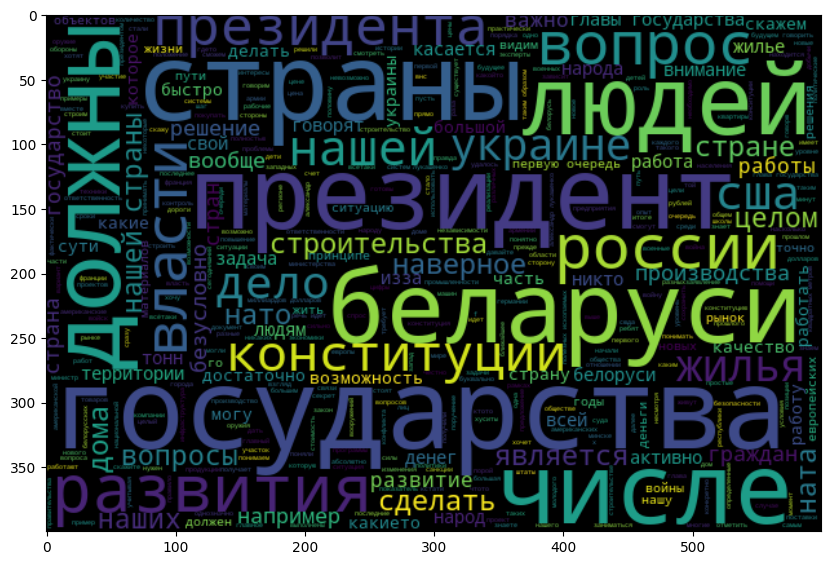

In [65]:
plt.figure(figsize=(10, 8), dpi=100)
wordcloud = WordCloud(background_color="black",
                            width=600,
                            height=400,
                            max_words=500,
                            repeat=False).generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.show()